In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0]) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
df['CustomerID'].mean()

np.float64(15287.690570239585)

In [8]:
df['CustomerID'] = df['CustomerID'].fillna(value = df['CustomerID'].mean())

In [9]:
(df.isnull().sum()/df.shape[0]) * 100

InvoiceNo      0.000000
StockCode      0.000000
Description    0.268311
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [10]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                            1
Name: count, Length: 4223, dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
(df.isnull().sum()/df.shape[0]) * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [13]:
# Filter out cancelled invoices (those starting with 'C') and rows with non-positive quantities or prices
filtered_df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
filtered_df = filtered_df[(filtered_df['Quantity'] > 0) & (filtered_df['UnitPrice'] > 0)]

# Display the number of rows before and after filtering
original_count = len(df)
filtered_count = len(filtered_df)

original_count, filtered_count


(540455, 530104)

In [14]:
# Group by Country and count the number of transactions (rows)
transactions_by_country = filtered_df.groupby("Country")["InvoiceNo"].count().sort_values(ascending=False)

# Display the top 10 countries by transaction volume
transactions_by_country.head(10)

Country
United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1966
Portugal            1501
Australia           1182
Name: InvoiceNo, dtype: int64

In [15]:
# Identify top-selling products by total quantity sold
top_products = (filtered_df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10))

In [16]:
#Prepare data for purchase trends over time
filtered_df["InvoiceDate"] = pd.to_datetime(filtered_df["InvoiceDate"])
purchase_trends = (filtered_df.set_index("InvoiceDate").resample("W")["Quantity"].sum())

In [17]:
# Compute monetary value per transaction
filtered_df["TotalPrice"] = filtered_df["Quantity"] * filtered_df["UnitPrice"]
monetary_per_transaction = (filtered_df.groupby("InvoiceNo")["TotalPrice"].sum())

In [18]:
# Compute monetary value per customer
monetary_per_customer = (filtered_df.groupby("CustomerID")["TotalPrice"].sum())

In [19]:
# RFM (Recency, Frequency, Monetary) calculation
snapshot_date = filtered_df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = filtered_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "TotalPrice": "Monetary"})

In [20]:
# Display summaries of computed datasets
{
    "Top Products": top_products,
    "Purchase Trends Sample": purchase_trends.head(),
    "Transaction Values (sample)": monetary_per_transaction.head(),
    "Customer Values (sample)": monetary_per_customer.head(),
    "RFM Sample": rfm.head()
}

{'Top Products': Description
 PAPER CRAFT , LITTLE BIRDIE           80995
 MEDIUM CERAMIC TOP STORAGE JAR        78033
 WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
 JUMBO BAG RED RETROSPOT               48474
 WHITE HANGING HEART T-LIGHT HOLDER    37891
 POPCORN HOLDER                        36761
 ASSORTED COLOUR BIRD ORNAMENT         36461
 PACK OF 72 RETROSPOT CAKE CASES       36419
 RABBIT NIGHT LIGHT                    30788
 MINI PAINT SET VINTAGE                26633
 Name: Quantity, dtype: int64,
 'Purchase Trends Sample': InvoiceDate
 2022-12-04     74447
 2022-12-11    127609
 2022-12-18    113997
 2022-12-25     43186
 2023-01-01         0
 Freq: W-SUN, Name: Quantity, dtype: int64,
 'Transaction Values (sample)': InvoiceNo
 536365    139.12
 536366     22.20
 536367    278.73
 536368     70.05
 536369     17.85
 Name: TotalPrice, dtype: float64,
 'Customer Values (sample)': CustomerID
 12346.0    77183.60
 12347.0     4310.00
 12348.0     1797.24
 12349.0     1757.55
 12350

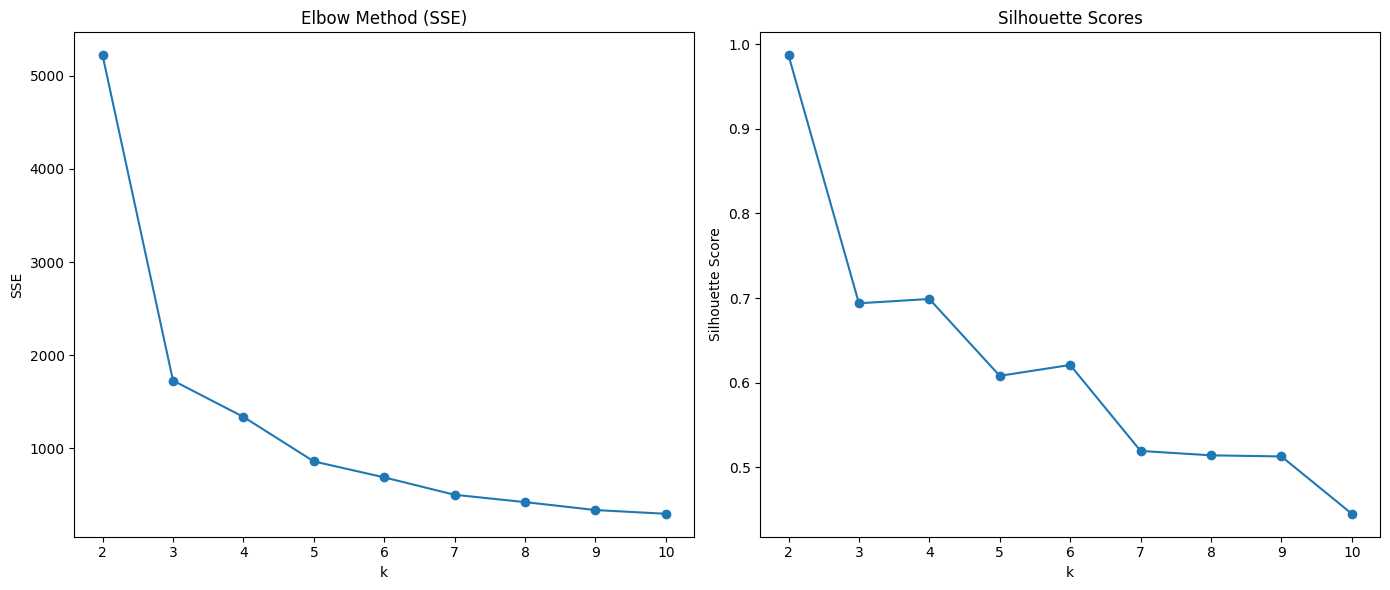

         Recency  Frequency   Monetary
Cluster                               
0           40.5        6.0     2038.7
1            1.0     2256.0  1447682.1
2          248.4        1.9      477.4
3            7.7       89.0   182182.0


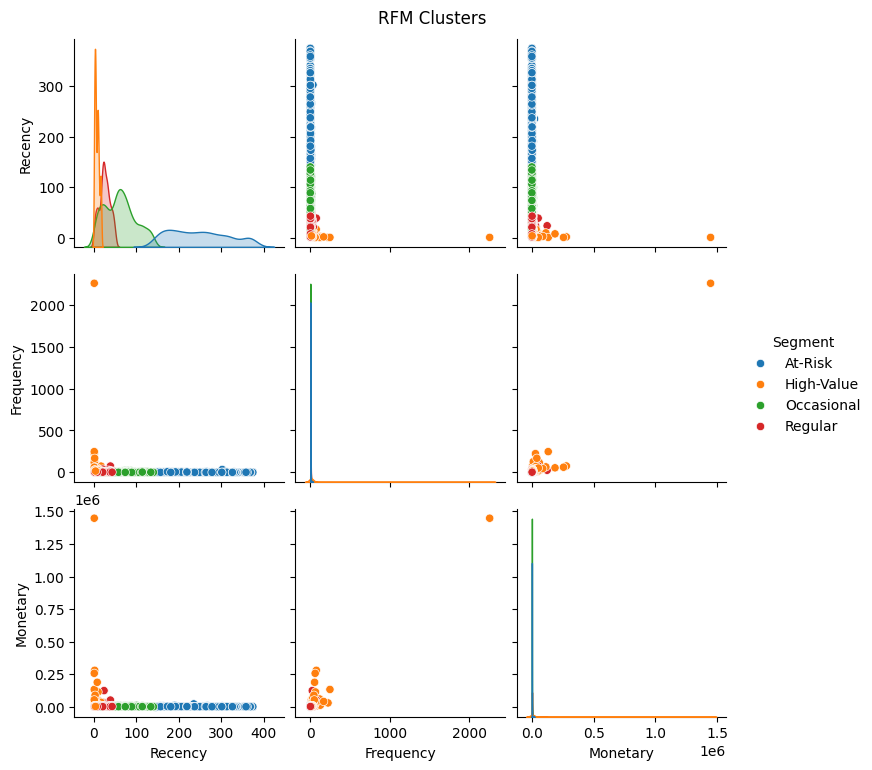

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

# Make sure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# --- RFM Feature Engineering ---
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
# Create 'TotalPrice' column before using it
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}).dropna()

# --- Normalize ---
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# --- Elbow Method + Silhouette Score ---
sse = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# --- Plot Elbow and Silhouette ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('k')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# --- Choose Optimal k (e.g. 4) ---
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# --- Cluster Averages for Labeling ---
cluster_summary = rfm.groupby('Cluster').mean().round(1)
print(cluster_summary)

# --- Label Clusters Based on Heuristics ---
def label_cluster(row):
    if row['Recency'] <= rfm['Recency'].quantile(0.25) and row['Frequency'] >= rfm['Frequency'].quantile(0.75):
        return 'High-Value'
    elif row['Recency'] <= rfm['Recency'].median() and row['Frequency'] >= rfm['Frequency'].median():
        return 'Regular'
    elif row['Recency'] >= rfm['Recency'].quantile(0.75):
        return 'At-Risk'
    else:
        return 'Occasional'

rfm['Segment'] = rfm.apply(label_cluster, axis=1)

# --- Visualize ---
sns.pairplot(rfm, hue='Segment', vars=['Recency', 'Frequency', 'Monetary'])
plt.suptitle('RFM Clusters', y=1.02)
plt.show()

# --- Save Model & Scaler ---
with open('kmeans_rfm_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('rfm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

rfm.to_csv("rfm_clusters_labeled.csv")
